In [1]:
import os
import cv2
import time

from diploma.drawing import draw_images, draw_landmarks, draw_rectangles
from diploma.models import FaceDetectorONNX

In [2]:
path= "E:/kbtu_courses/diploma_project/src/diploma/photos/analysis_data2"

detector = FaceDetectorONNX("E:\kbtu_courses\diploma_project\src\diploma\models\detector\weights\model_detector.onnx")

In [3]:
total = 0

for folder in os.listdir(path):
    if os.path.isdir(os.path.join(path, folder)):
        folder_path = os.path.join(path, folder)
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
        total += len(image_files)

print("Total number of images:", total)

Total number of images: 0


# Quality

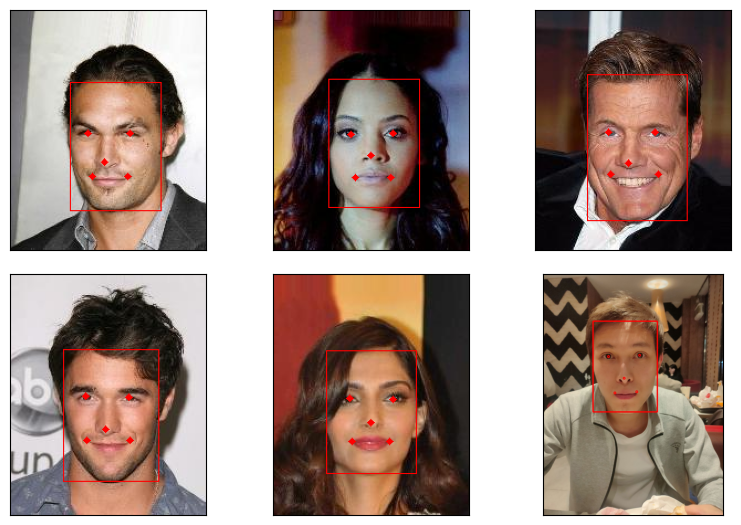

In [9]:
path= "E:/kbtu_courses/diploma_project/src/diploma/photos/analysis_data2"
images = []

image_paths = [os.path.join(path, filename) for filename in os.listdir(path) if filename.endswith('.jpg')]
for i in range(23,29):
    x = cv2.imread(image_paths[i])
    face_bbox, face_landmarks = detector(x)
    if i == 28:
        x = draw_rectangles(x, bboxes = face_bbox, thickness=5, override=True)
        x = draw_landmarks(x, landmarks=face_landmarks, radius=5, override=True)
    else:
        x = draw_rectangles(x, bboxes = face_bbox, override=True)
        x = draw_landmarks(x, landmarks=face_landmarks, override=True)
    images.append(x)

draw_images(images=images, image_num=29, read_images=False, spacing=(0.1, 0.05))

# Speed

In [4]:
image_paths = [os.path.join(path, filename) for filename in os.listdir(path) if filename.endswith('.jpg')]

computation_times = []

for i in range(len(image_paths)):
    start_time = time.time()
    x = cv2.imread(image_paths[i])
    face_bbox, face_landmarks = detector(x)
    end_time = time.time()

    computation_time = end_time - start_time
    computation_times.append(computation_time)

average = sum(computation_times) / len(computation_times)
print("Average computation time:", average, "seconds")

Average computation time: 0.12395544709830449 seconds


In [5]:
image_paths = [os.path.join(path, filename) for filename in os.listdir(path) if filename.endswith('.jpg')]

computation_times = []

for i in range(len(image_paths)):
    x = cv2.imread(image_paths[i])
    start_time = time.time()
    face_bbox, face_landmarks = detector(x)
    end_time = time.time()

    computation_time = end_time - start_time
    computation_times.append(computation_time)

average = sum(computation_times) / len(computation_times)
print("Average computation time:", average, "seconds")

Average computation time: 0.014571066560416386 seconds
